In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/TripA27.csv
input/TripA26.csv
input/TripA32.csv
input/TripA18.csv
input/TripA24.csv
input/TripA30.csv
input/TripA31.csv
input/TripA25.csv
input/TripA19.csv
input/TripA21.csv
input/TripA09.csv
input/TripA08.csv
input/TripA20.csv
input/TripA22.csv
input/TripA23.csv
input/readin.m
input/TripB26.csv
input/TripB32.csv
input/TripB33.csv
input/TripB27.csv
input/TripB19.csv
input/TripB31.csv
input/TripB25.csv
input/TripB24.csv
input/TripB30.csv
input/TripB18.csv
input/TripB34.csv
input/TripB20.csv
input/TripB08.csv
input/TripB09.csv
input/TripB21.csv
input/TripB35.csv
input/TripB23.csv
input/TripB37.csv
input/TripB36.csv
input/TripB22.csv
input/Overview.xlsx
input/TripB07.csv
input/TripB13.csv
input/TripB12.csv
input/TripB06.csv
input/TripB38.csv
input/TripB10.csv
input/TripB04.csv
input/TripB05.csv
input/TripB11.csv
input/TripB15.csv
input/TripB01.csv
input/TripB29.csv
input/TripB28.csv
input/TripB14.csv
input/TripB02.csv
input/TripB16.csv
input/TripB17.csv
input/TripB03.csv
input/TripA

In [7]:
import pandas as pd
import numpy as np
import os, chardet, glob
import matplotlib.pyplot as plt
import seaborn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras import Sequential, optimizers, losses, layers

In [6]:
df_overview = pd.read_excel('input/Overview.xlsx')
df_overview = df_overview.drop(['Unnamed: 13','Note'], axis=1)
df_overview = df_overview.dropna()
df_overview.rename(columns = {'Unnamed: 8':'SoC difference'}, inplace = True)
df_overview.head()

,Trip,Date,Route/Area,Weather,Battery Temperature (Start) [°C],Battery Temperature (End),Battery State of Charge (Start),Battery State of Charge (End),SoC difference,Ambient Temperature (Start) [°C],Target Cabin Temperature,Distance [km],Duration [min],Fan
0,TripA01,2019-06-25_13-21-14,Munich East,sunny,21.0,22.0,0.863,0.803,0.060,25.5,23.0,7.427690,16.820000,"Automatic, Level 1"
1,TripA02,2019-06-25_14-05-31,Munich East,sunny,23.0,26.0,0.803,0.673,0.130,32.0,23.0,23.509709,23.550000,"Automatic, Level 1"
2,TripA03,2019-06-28_10-02-15,Munich East,sunny,24.0,25.0,0.835,0.751,0.084,21.5,27.0,12.820846,11.180000,"Automatic, Level 1"
3,TripA04,2019-06-28_10-13-30,Munich East,sunny,25.0,27.0,0.751,0.667,0.084,24.0,22.0,10.727491,6.870000,"Automatic, Level 1"
4,TripA05,2019-06-28_10-20-26,Munich East,sunny,27.0,27.0,0.667,0.602,0.065,24.5,24.0,12.393223,22.776667,"Automatic, Level 1"


In [9]:
def combine_csvs():
    ''' Combine all csv datasets into a single file'''
    df_master = pd.DataFrame()
    for filename in glob.glob('input/'+'*.csv'):
        df_trip = pd.read_csv(
            filename,
            sep=';',
            encoding=chardet.detect(open(filename, 'rb').read())['encoding']
        )
        df_master = pd.concat([df_master, df_trip])
        print(df_master)
        df_master.to_csv('input/AllTrips.csv', index=False)
    return df_master


def plot_dataframe_subplots(df, nrows, ncols, figsize=(30, 24)):
    """Plot a nrows x ncols grid of the df variables"""
    measurements = list(df.columns)
    plt.figure(figsize=figsize)
    for idx, key in enumerate(measurements):
        plt.subplot(nrows, ncols, idx+1)
        plt.plot(np.array(range(df.shape[0]))*0.1, df[key])
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel(measurements[0])
        plt.show

In [10]:
# Load in the dataset
import os
import glob
import chardet 
import pandas as pd
df_master = pd.DataFrame()
for file_name in glob.glob('input/'+'*.csv'):
    rawdata = open(file_name, 'rb').read()
    result = chardet.detect(rawdata)
    charenc = result['encoding']
    df_trip = pd.read_csv(file_name, sep = ';',encoding = charenc)
    df_master = df_master.append(df_trip)

# Remove last 2 columns since they are Nan
df_master = df_master.iloc[: , :-2]
print(list(df_master.columns.values))

/var/folders/cs/lm89x9b1687gr96stxr0mjzm0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_3511/3807976874.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_master = df_master.append(df_trip)
/var/folders/cs/lm89x9b1687gr96stxr0mjzm0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_3511/3807976874.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_master = df_master.append(df_trip)
/var/folders/cs/lm89x9b1687gr96stxr0mjzm0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_3511/3807976874.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_master = df_master.append(df_trip)
/var/folders/cs/lm89x9b1687gr96stxr0mjzm0000gn/T/com.apple.shortcuts.mac-helper/ipykernel_3511/3807976874.py:12: FutureWarning: The frame.appe

['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'Heating Power LIN [W]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]', 'Heater Current [A]', 'Ambient Temperature [°C]', 'Coolant Temperature Heatercore [°C]', 'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]', 'Ambient Temperature Sensor [°C]', 'Coolant Volume Flow +500 [l/h]', 'Temperature Coolant Heater Inlet [°C]', 'Temperature Coolant Heater Outlet [°C]', 'Temperature Heat Exchanger Outlet [°C]', 'Temperature Defrost lateral left [°C]', 'Temperature Defrost lateral right [°C]', 'Temperature Defrost centr

In [ ]:
df_master.head()

In [11]:
# Plot results of all trips
plot_dataframe_subplots(df_master, nrows=12, ncols=4, figsize=(30, 48))

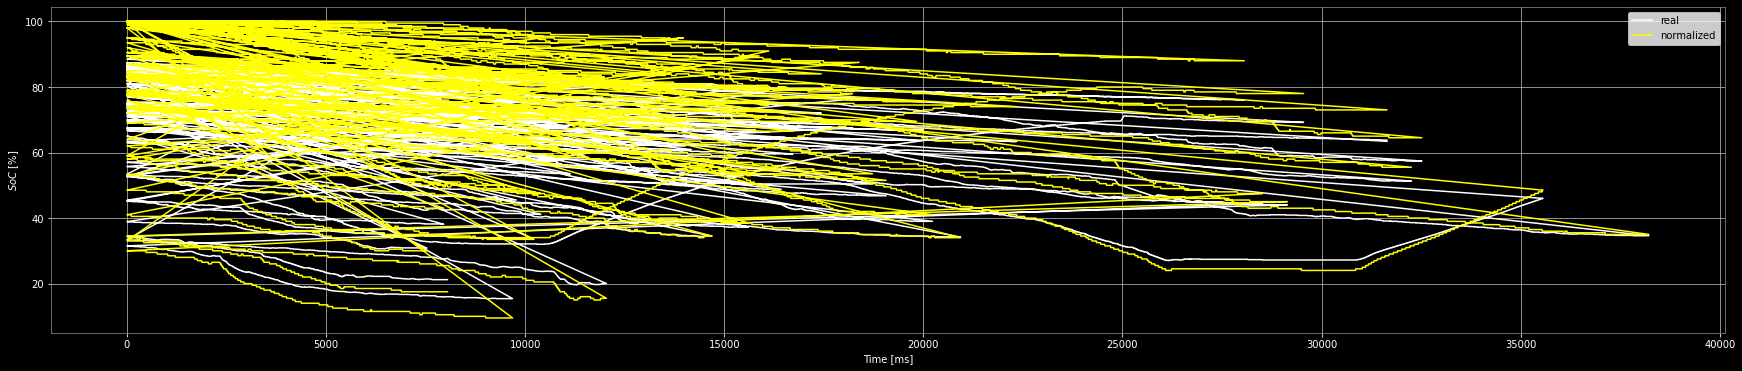

In [7]:
df_soc = df_master[['SoC [%]', 'displayed SoC [%]']].dropna()

# Let us look at battery SoC degradation over vehicle exploitation
plt.figure(figsize=(30, 6), facecolor='black')
ax = plt.axes()
ax.set_facecolor("black")
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.tick_params(colors='white', which='both')
plt.grid(True)

plt.plot(df_soc['SoC [%]'], color="white")
plt.plot(df_soc['displayed SoC [%]'], color="yellow")
plt.xlabel('Time [ms]', color='white')
plt.ylabel('$SoC$ [%]', color='white')
plt.legend(['real','normalized'])

<AxesSubplot:>

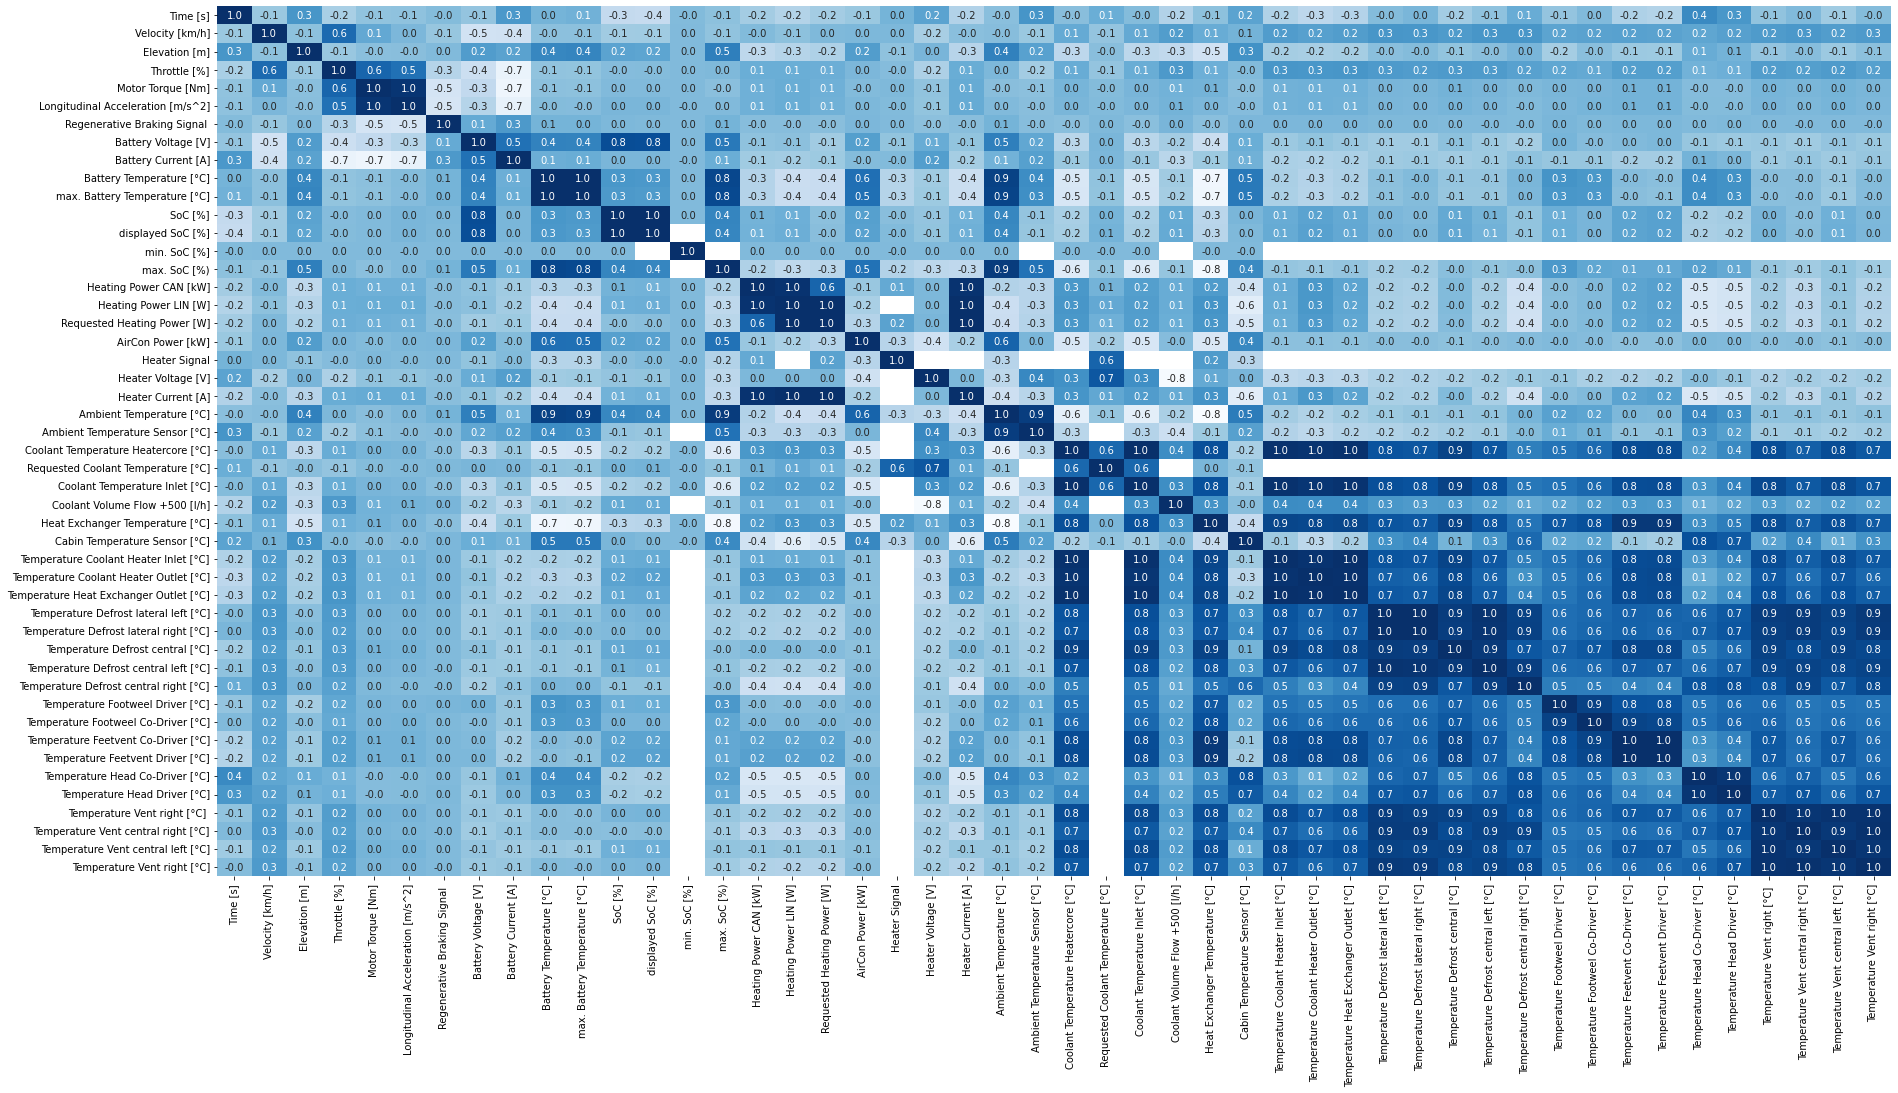

In [8]:
# Correlation between features
plt.figure(figsize=(30, 16))
seaborn.heatmap(df_master.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

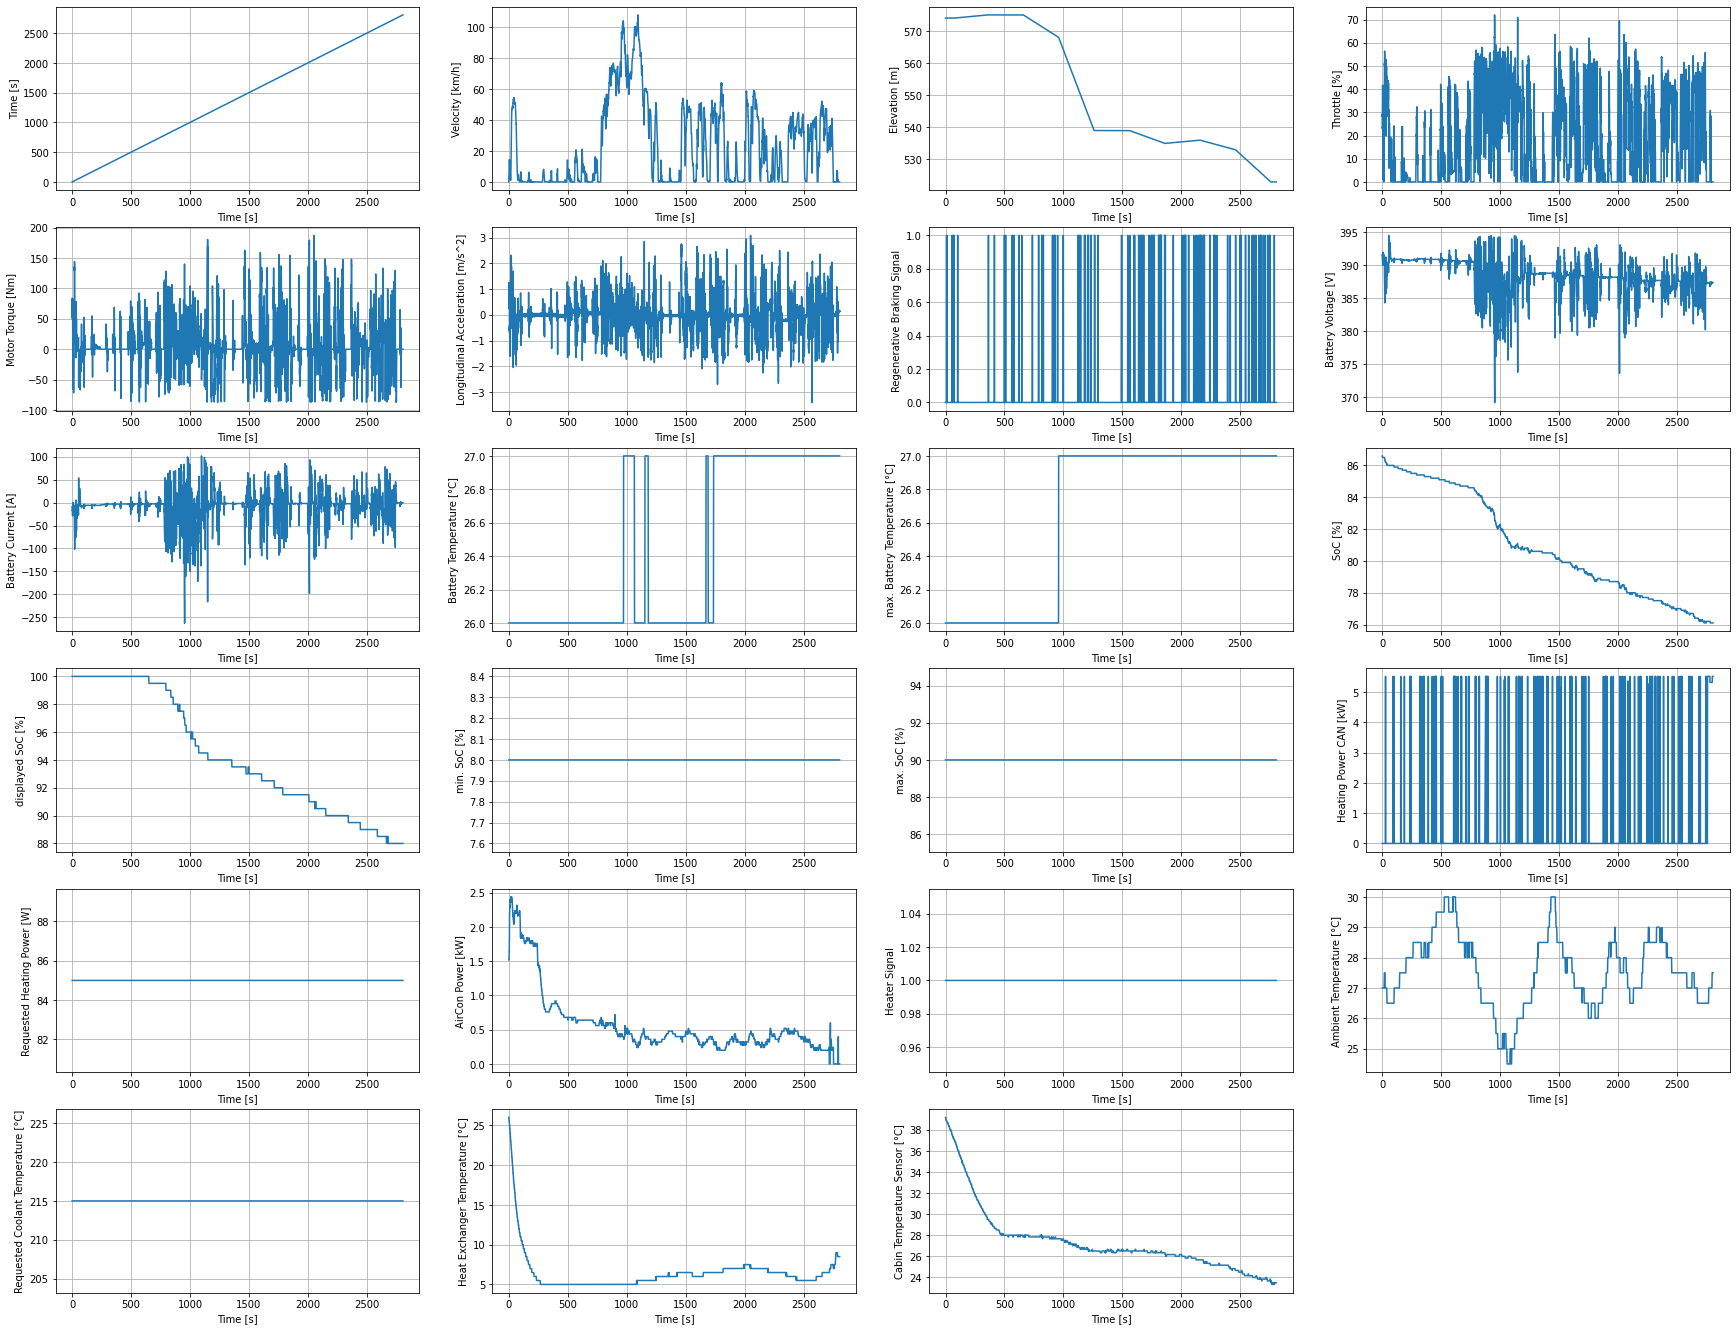

In [9]:
# Bring in a single trip as dataframe
df_trip = pd.read_csv(
    '../input/battery-and-heating-data-in-real-driving-cycles/TripA08.csv',
    sep=';',
    encoding=chardet.detect(open(f'../input/battery-and-heating-data-in-real-driving-cycles/TripA08.csv', 'rb').read())['encoding']
)
# Plot results of a single trips
plot_dataframe_subplots(df_trip, nrows=12, ncols=4, figsize=(30, 48))

<AxesSubplot:>

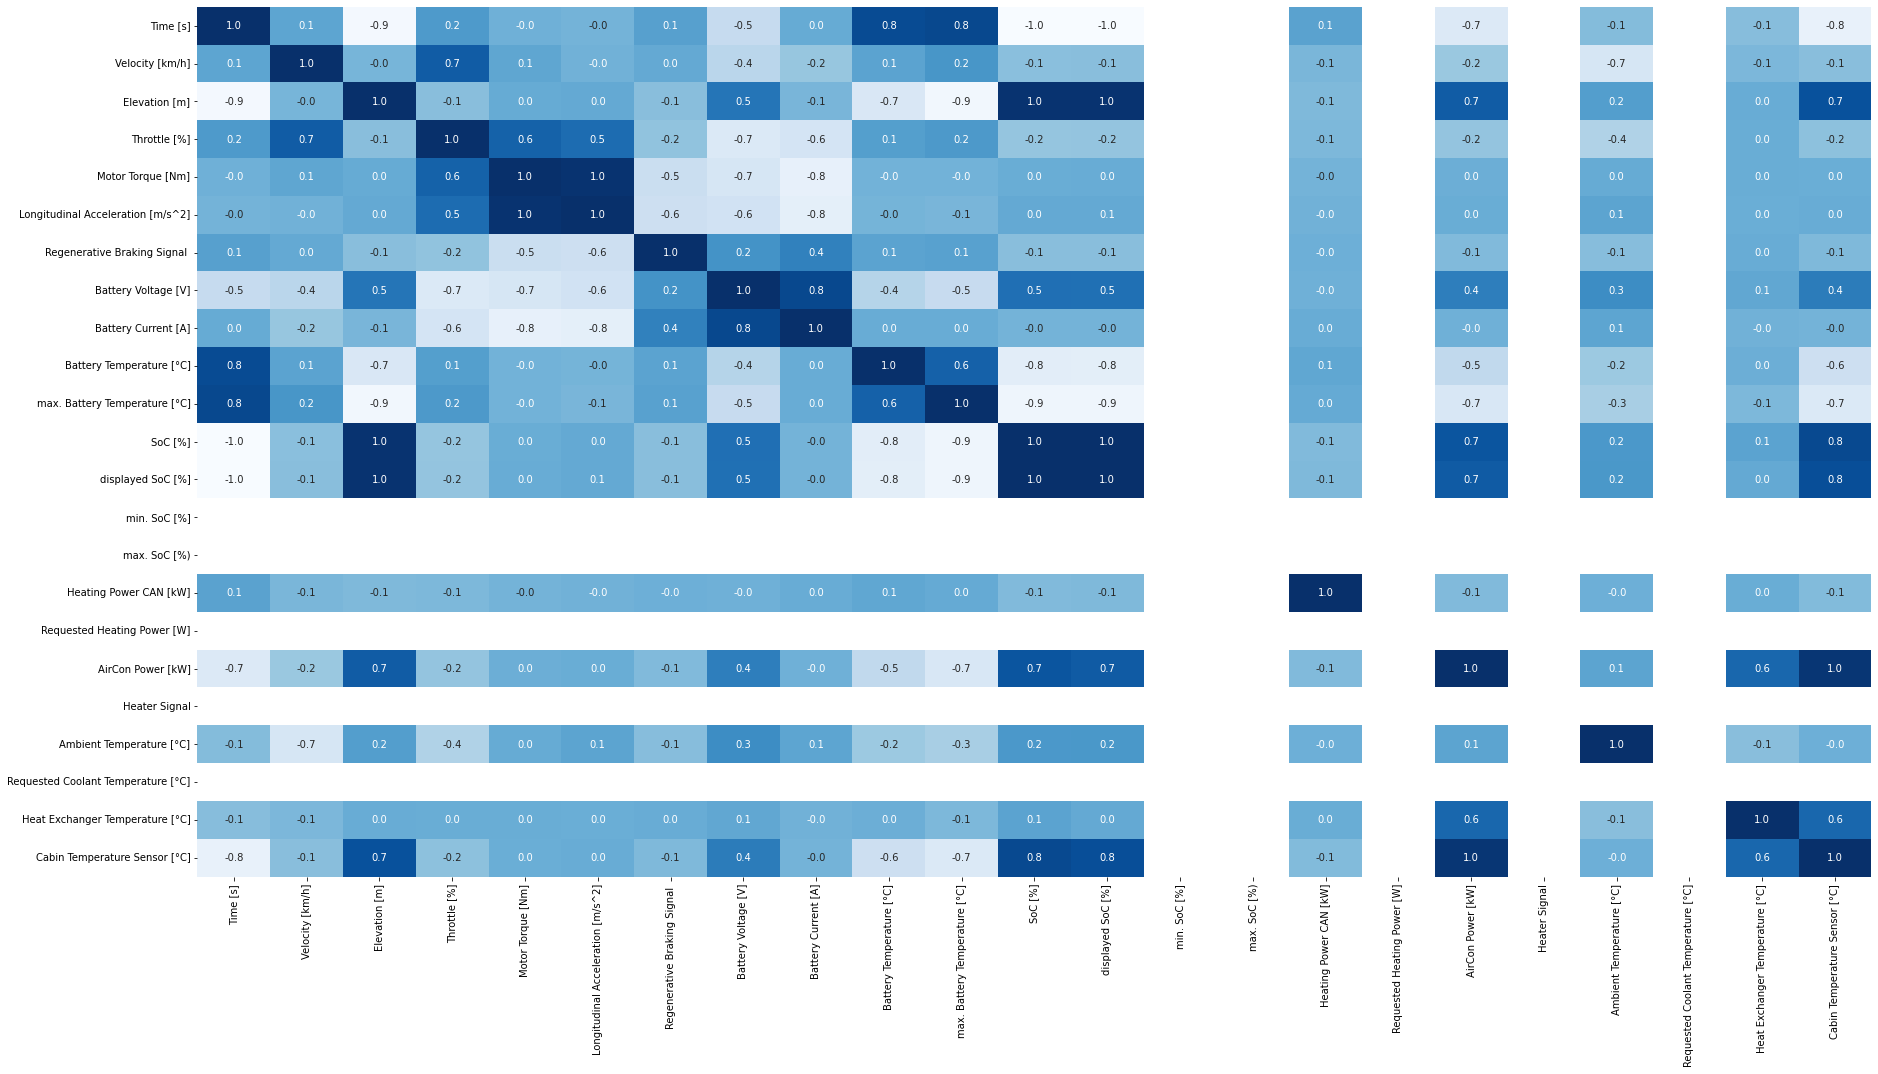

In [10]:
# Correlation between features
plt.figure(figsize=(30, 16))
seaborn.heatmap(df_trip.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [11]:
def set_negative_plot_color():
    plt.figure(figsize=(30, 6), facecolor='black')
    ax = plt.axes()
    ax.set_facecolor("black")
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(colors='white', which='both')
    plt.grid(True)


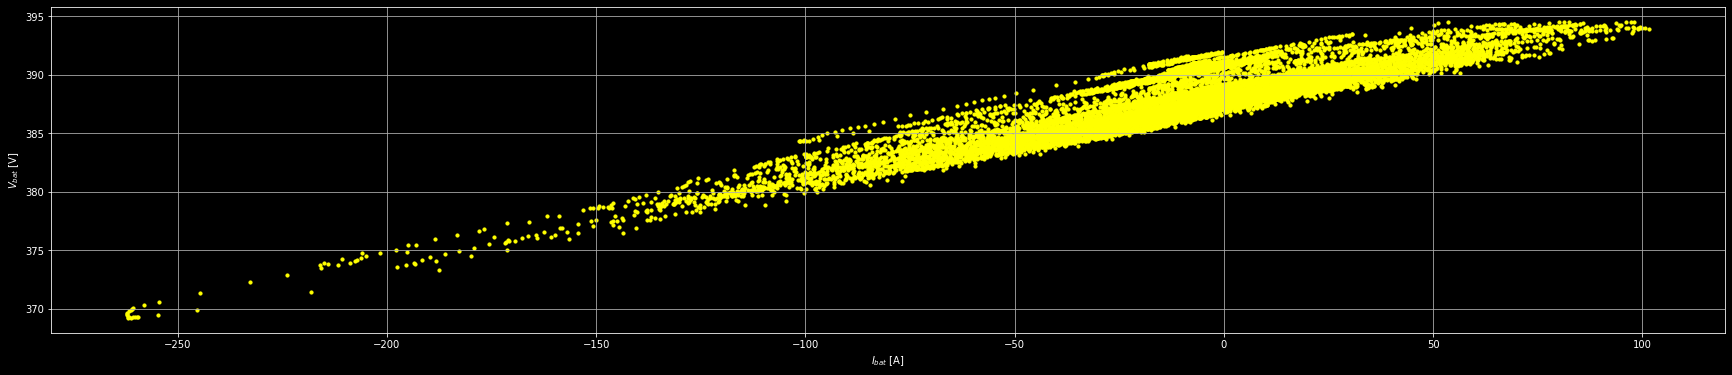

In [12]:
set_negative_plot_color()
plt.scatter(df_trip['Battery Current [A]'], df_trip['Battery Voltage [V]'], color="yellow", s=10)
plt.xlabel('$I_{bat}$ [A]', color='white')
plt.ylabel('$V_{bat}$ [V]', color='white');

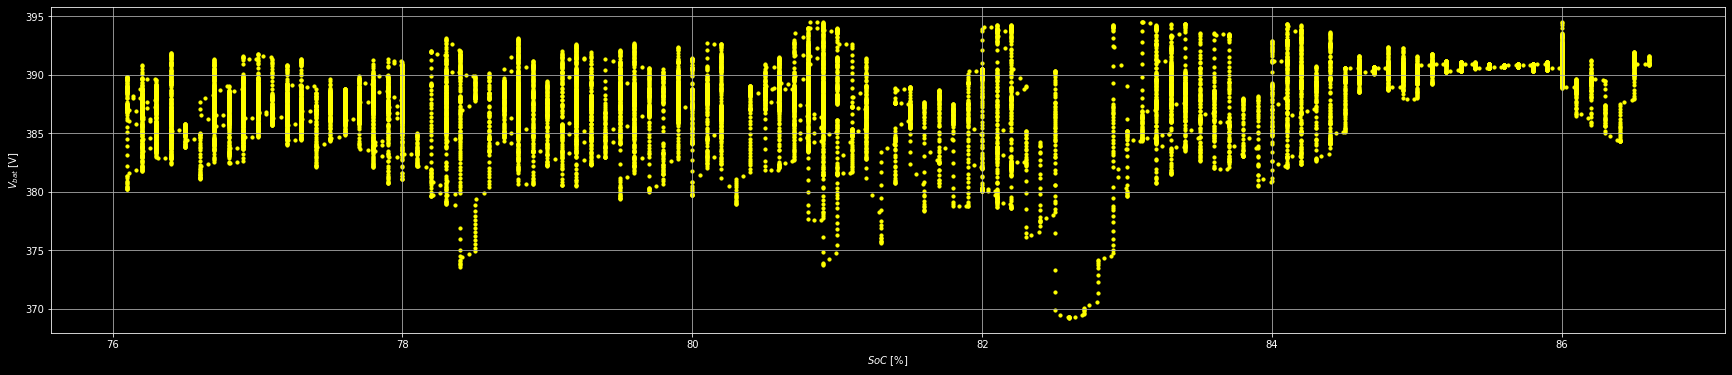

In [13]:
set_negative_plot_color()
plt.scatter(df_trip['SoC [%]'], df_trip['Battery Voltage [V]'], color="yellow", s=10)
plt.xlabel('$SoC$ [%]', color='white')
plt.ylabel('$V_{bat}$ [V]', color='white');

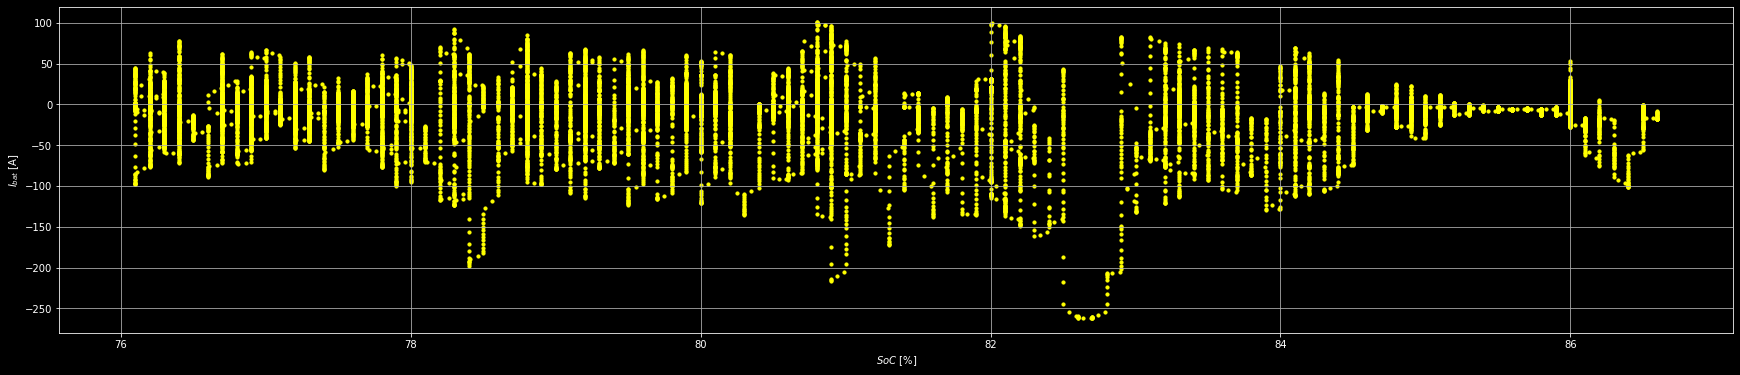

In [14]:
set_negative_plot_color()
plt.scatter(df_trip['SoC [%]'], df_trip['Battery Current [A]'], color="yellow", s=10)
plt.xlabel('$SoC$ [%]', color='white')
plt.ylabel('$I_{bat}$ [A]', color='white');

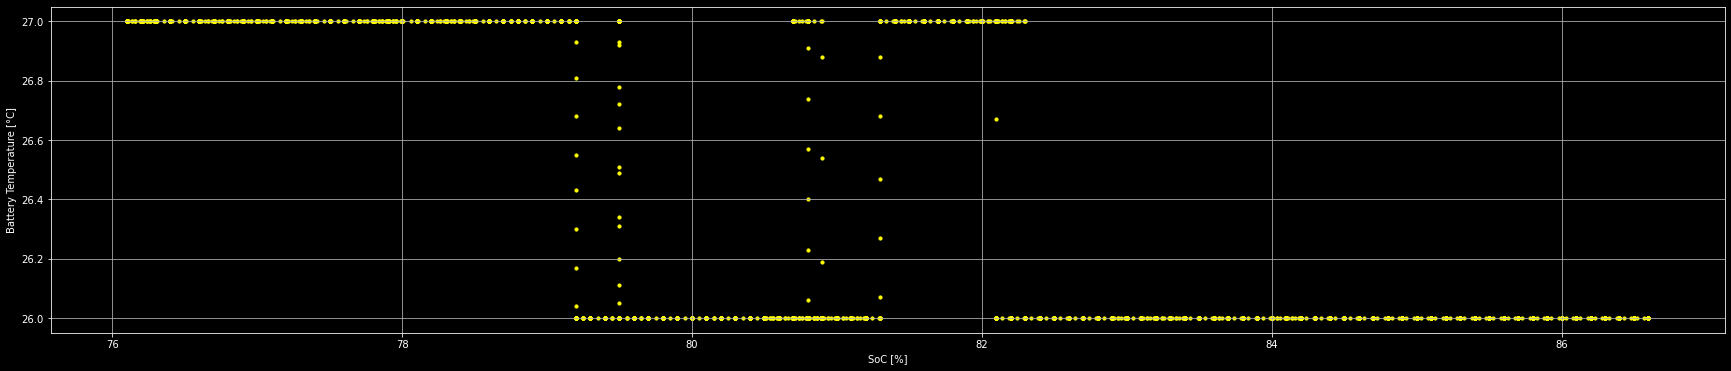

In [15]:
set_negative_plot_color()
plt.scatter(df_trip['SoC [%]'], df_trip['Battery Temperature [°C]'], color="yellow", s=10)
plt.xlabel('SoC [%]', color='white')
plt.ylabel('Battery Temperature [°C]', color='white');

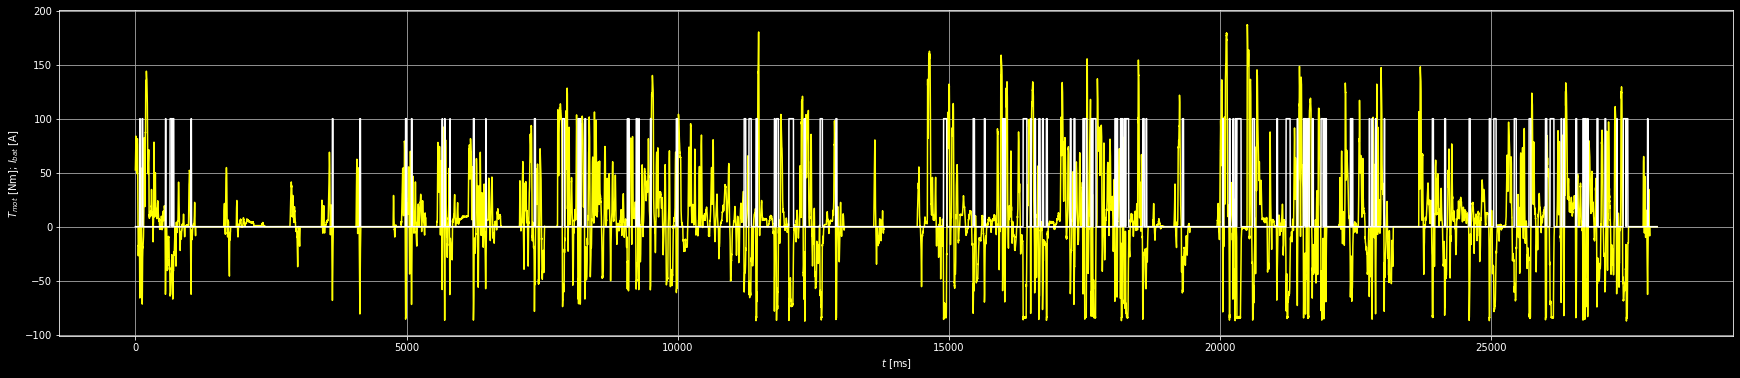

In [16]:
set_negative_plot_color()
plt.plot(df_trip['Motor Torque [Nm]'], color="yellow")
plt.plot(df_trip['Regenerative Braking Signal ']*100, color="white")
plt.xlabel('$t$ [ms]', color='white')
plt.ylabel('$T_{mot}$ [Nm]; $I_{bat}$ [A]', color='white');

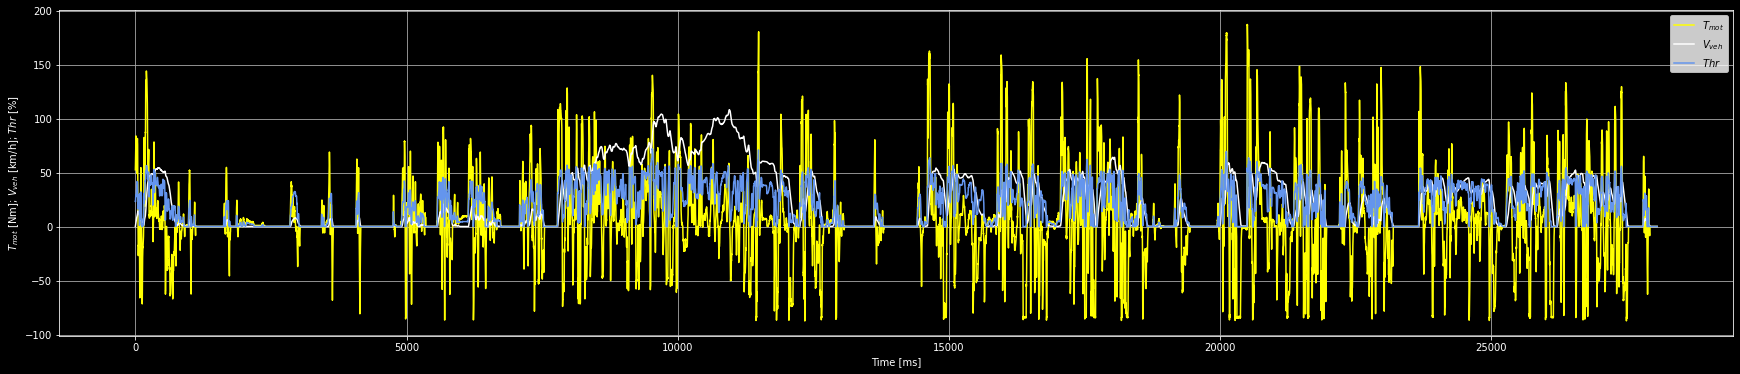

In [17]:
set_negative_plot_color()
plt.plot(df_trip['Motor Torque [Nm]'], color="yellow")
plt.plot(df_trip['Velocity [km/h]'], color="white")
plt.plot(df_trip['Throttle [%]'], color="cornflowerblue")
plt.xlabel('Time [ms]', color='white')
plt.ylabel('$T_{mot}$ [Nm]; $V_{veh}$ [km/h]; $Thr$ [%]', color='white')
plt.legend(['$T_{mot}$','$V_{veh}$','$Thr$']);

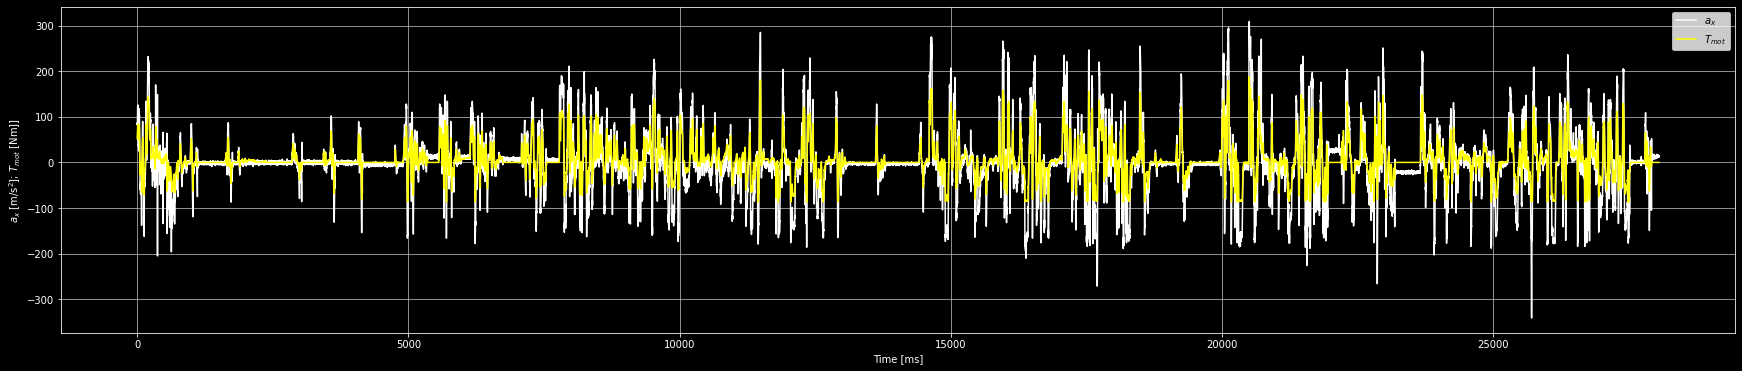

In [18]:
set_negative_plot_color()
plt.plot(df_trip['Longitudinal Acceleration [m/s^2]']*100, color="white")
plt.plot(df_trip['Motor Torque [Nm]'], color="yellow")
plt.xlabel('Time [ms]', color='white')
plt.ylabel('$a_{x}$ [m/s$^{2}]$; $T_{mot}$ [Nm]]', color='white')
plt.legend(['$a_{x}$','$T_{mot}$']);

In [19]:
def regression_matrics(y_test, y_pred):
    # calculate errors
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # report error
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Square Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')


def plot_comparison(y_test, y_pred, xlabel, ylabel, dark_mode=False, figsize=(30, 6)):
    if dark_mode:
        plt.figure(figsize=figsize, facecolor='black')
        ax = plt.axes()
        ax.set_facecolor("black")
        ax.spines['bottom'].set_color('gray')
        ax.spines['top'].set_color('gray')
        ax.spines['right'].set_color('gray')
        ax.spines['left'].set_color('gray')
        ax.tick_params(colors='white', which='both')
        plt.plot(y_pred, color="yellow")
        plt.plot(y_test, color="white")
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel, color='white')
        plt.ylabel(ylabel, color='white')
    else:
        plt.figure(figsize=figsize)
        plt.plot(y_pred)
        plt.plot(y_test)        
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.grid(True)

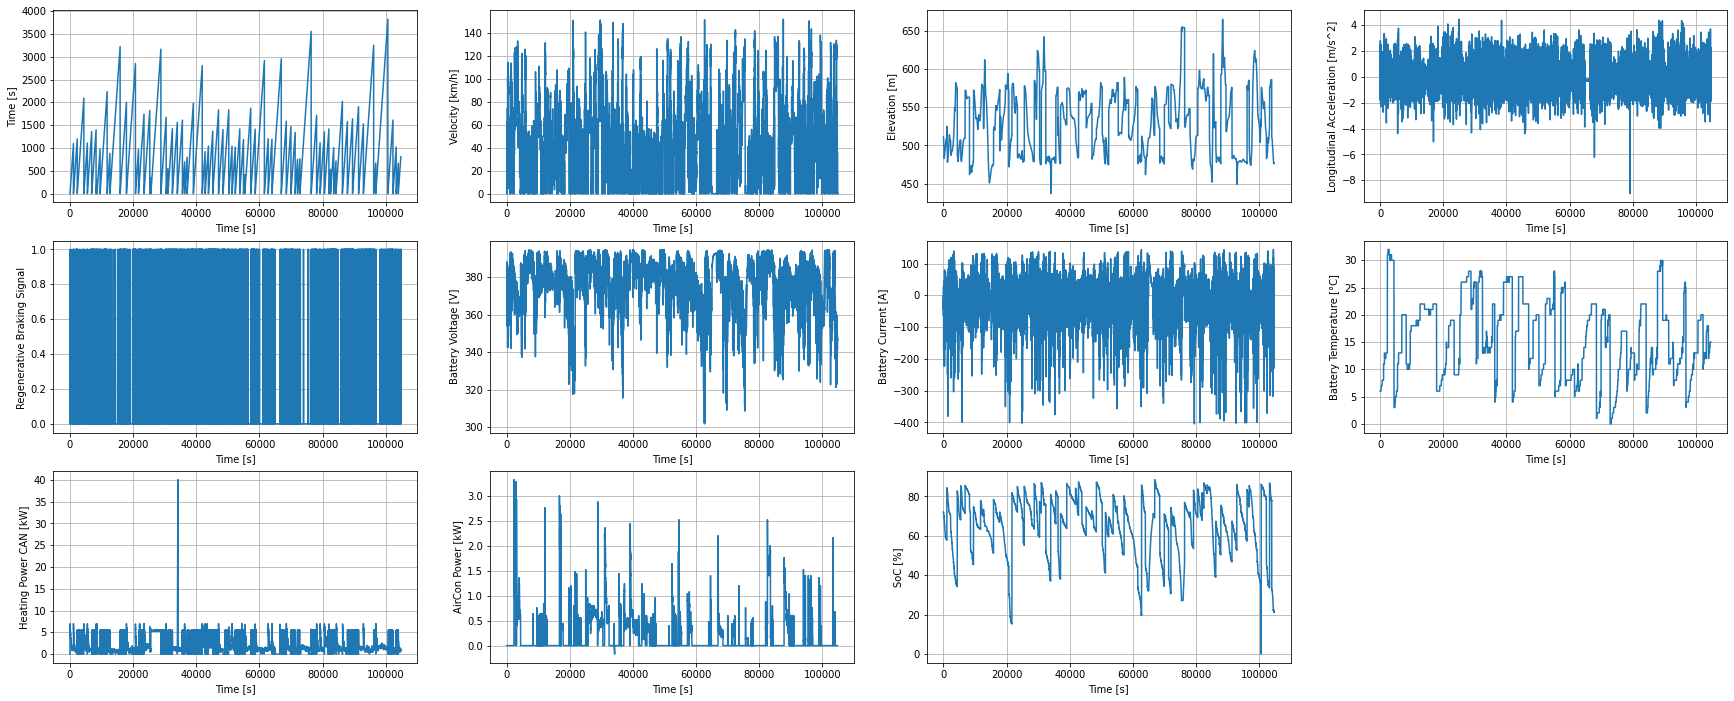

In [20]:
df_x_y = df_master[['Time [s]','Velocity [km/h]','Elevation [m]','Longitudinal Acceleration [m/s^2]','Regenerative Braking Signal ','Battery Voltage [V]',
                    'Battery Current [A]','Battery Temperature [°C]','Heating Power CAN [kW]','AirCon Power [kW]','SoC [%]']].dropna()

plot_dataframe_subplots(df_x_y, nrows=3, ncols=4, figsize=(30, 12))

In [21]:
# Create and split train and test datasets
X = df_x_y.drop(['Time [s]','SoC [%]'], axis=1)
y = df_x_y[['SoC [%]']]
splitter = int(len(X)*0.7)
X_train = X.values[:splitter]
X_test = X.values[splitter:]
y_train = y.values[:splitter]
y_test = y.values[splitter:]
# Check the dataset sizes
X_train.shape, y_train.shape, X_test.shape, y_test.shape[0]

((733299, 9), (733299, 1), (314272, 9), 314272)

Linear Regression:
Mean Squared Error: 25.35845895821733
Root Mean Square Error: 5.03571831601186
Mean Absolute Error: 3.4707187507759523


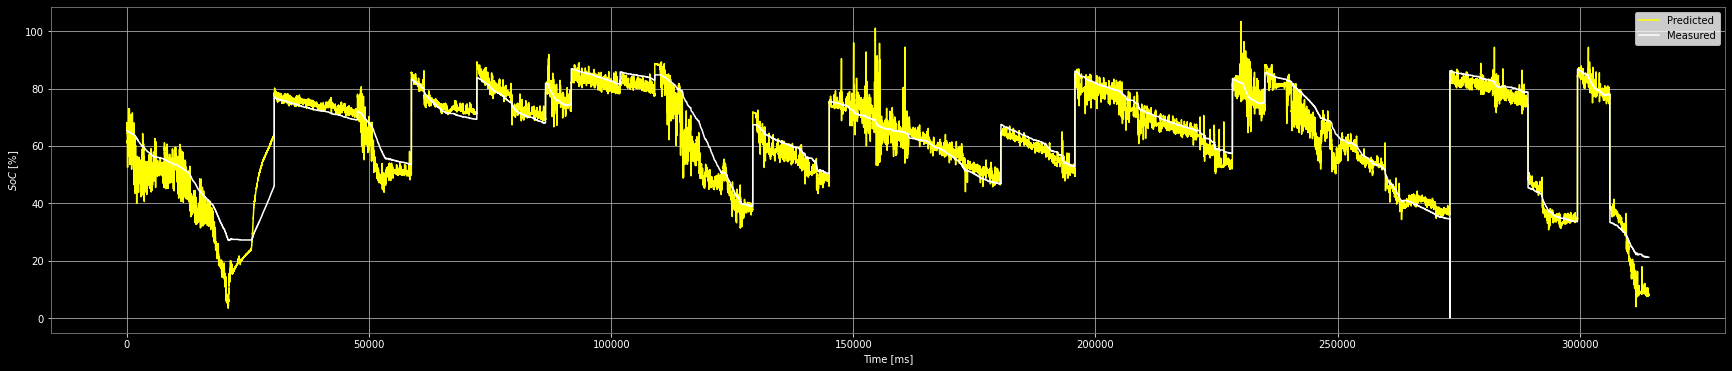

In [22]:
# 1. Create a model
regressor = LinearRegression()
# 2. Fit the model
regressor.fit(X_train, y_train)
# 3. Make predicitons with the model
y_pred_lr = regressor.predict(X_test)
# 4. Evaluate and visualize
print('Linear Regression:')
regression_matrics(y_test, y_pred_lr)
plot_comparison(y_test=y_test, y_pred=y_pred_lr, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=True)

2022-10-13 09:55:38.959115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 09:55:39.058774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 09:55:39.059559: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-13 09:55:39.060957: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Neural Network:
Mean Squared Error: 168.97865606849953
Root Mean Square Error: 12.999179053636407
Mean Absolute Error: 10.792505110893785


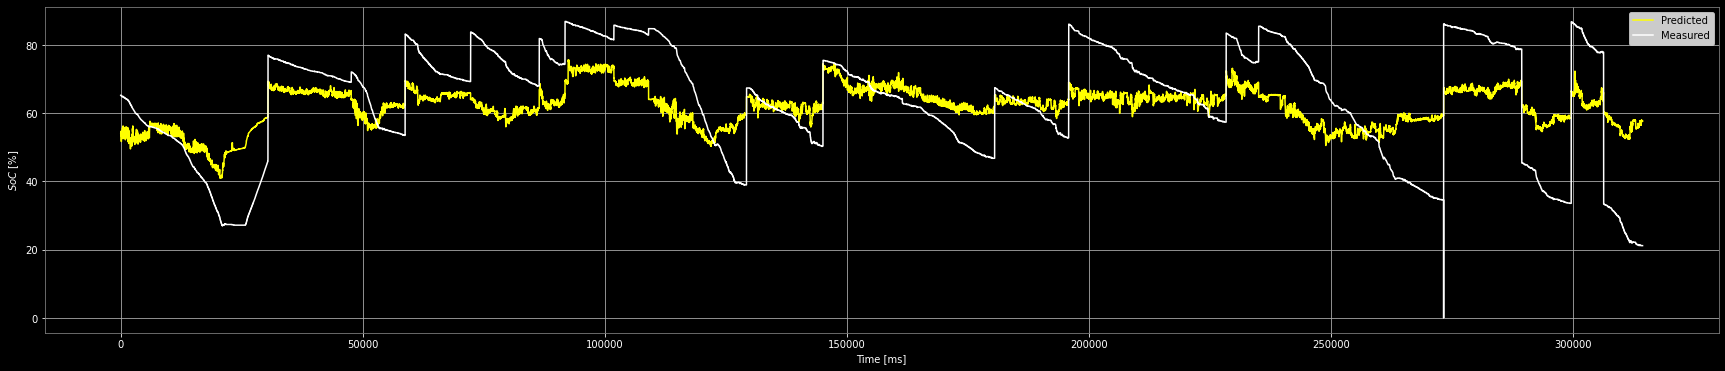

In [23]:
# 1. Create a model
regressor = Sequential([
    layers.Dense(10),
    layers.Dense(1),
])
# 2. Compile a model
regressor.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss=losses.mae,
                  metrics=["mae"])
# 3. Fit a model
regressor.fit(X_train, y_train, epochs=5, verbose=0)
# 4. Validate the model
y_pred_nn = regressor.predict(X_test)
# 5. Evaluate and visualize
print('Neural Network:')
regression_matrics(y_test, y_pred_nn)
plot_comparison(y_test=y_test, y_pred=y_pred_nn, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=True)

Neural Network:
Mean Squared Error: 159.77222707777383
Root Mean Square Error: 12.640103918788556
Mean Absolute Error: 9.801553447424068


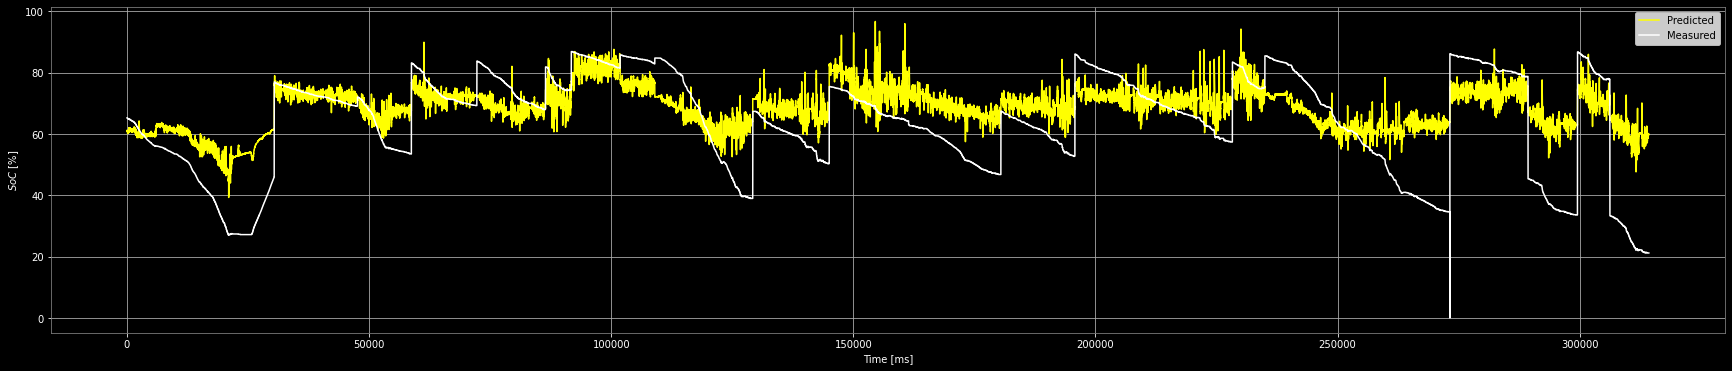

In [24]:
# 1. Create a model
regressor = Sequential([
    layers.Dense(100),
    layers.Dense(1),
])
# 2. Compile a model
regressor.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss=losses.mae,
                  metrics=["mae"])
# 3. Fit a model
regressor.fit(X_train, y_train, epochs=5, verbose=0)
# 4. Validate the model
y_pred_nn = regressor.predict(X_test)
# 5. Evaluate and visualize
print('Neural Network:')
regression_matrics(y_test, y_pred_nn)
plot_comparison(y_test=y_test, y_pred=y_pred_nn, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=True)

Neural Network:
Mean Squared Error: 29.131039174558147
Root Mean Square Error: 5.397317775947434
Mean Absolute Error: 3.6125346011684556


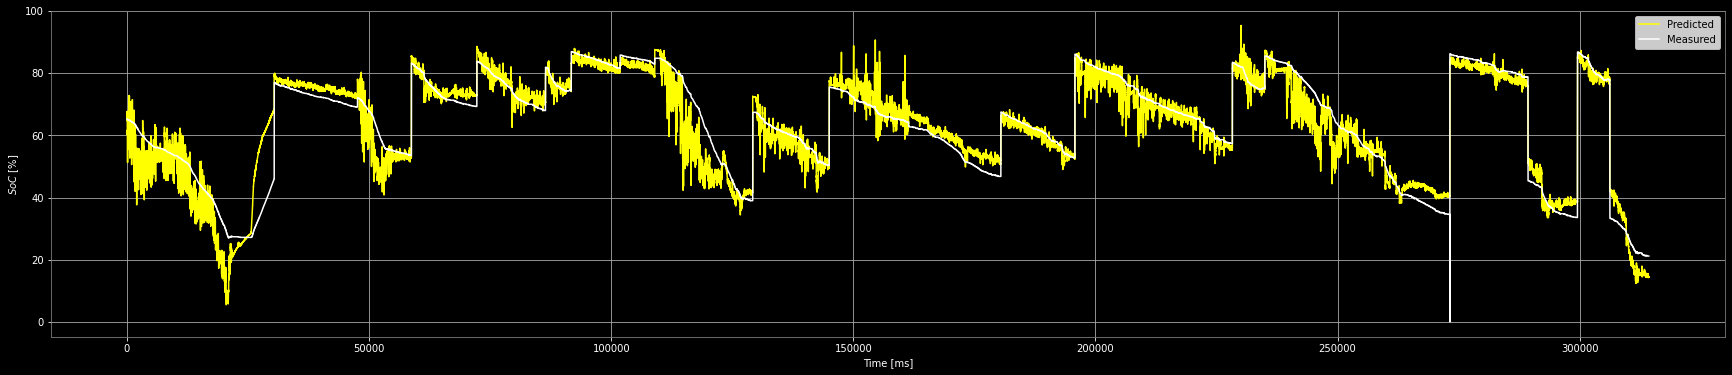

In [25]:
# 1. Create a model
regressor = Sequential([
    layers.Dense(10),
    layers.Dense(10),
    layers.Dense(1),
])
# 2. Compile a model
regressor.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss=losses.mae,
                  metrics=["mae"])
# 3. Fit a model
regressor.fit(X_train, y_train, epochs=10, verbose=0)
# 4. Validate the model
y_pred_nn = regressor.predict(X_test)
# 5. Evaluate and visualize
print('Neural Network:')
regression_matrics(y_test, y_pred_nn)
plot_comparison(y_test=y_test, y_pred=y_pred_nn, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=True)

Neural Network:
Mean Squared Error: 68.66218418485987
Root Mean Square Error: 8.286264790897034
Mean Absolute Error: 6.779027116047575


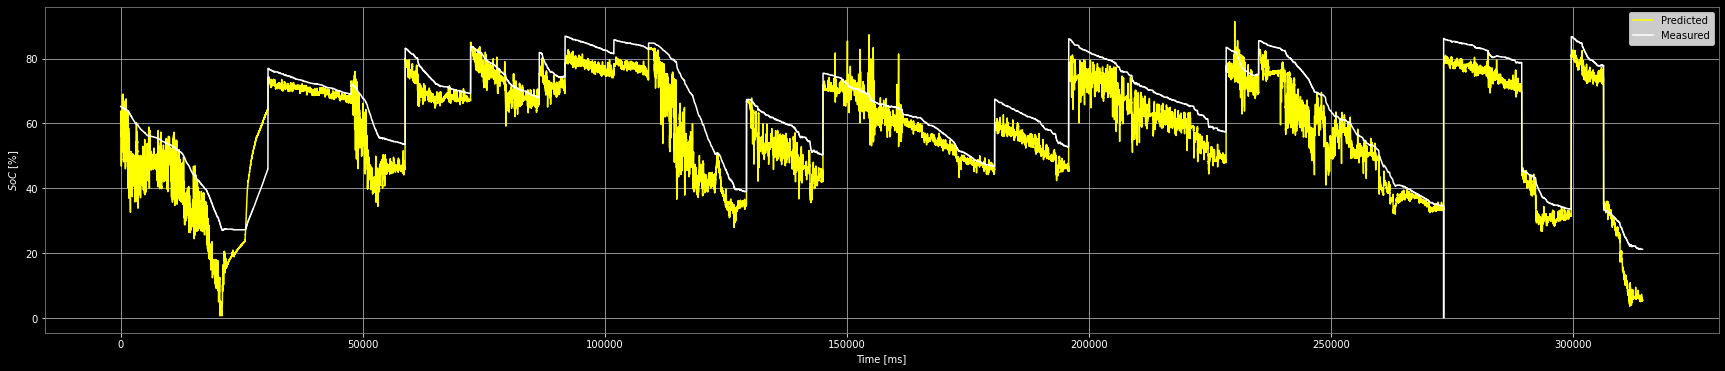

In [26]:
# 1. Create a model
regressor = Sequential([
    layers.Dense(10),
    layers.Dense(100),
    layers.Dense(1),
])
# 2. Compile a model
regressor.compile(optimizer=optimizers.Adam(learning_rate=0.001),
                  loss=losses.mae,
                  metrics=["mae"])
# 3. Fit a model
regressor.fit(X_train, y_train, epochs=10, verbose=0)
# 4. Validate the model
y_pred_nn = regressor.predict(X_test)
# 5. Evaluate and visualize
print('Neural Network:')
regression_matrics(y_test, y_pred_nn)
plot_comparison(y_test=y_test, y_pred=y_pred_nn, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=True)

Neural Network:
Mean Squared Error: 25.721590336365484
Root Mean Square Error: 5.071645722678733
Mean Absolute Error: 3.662060910292295


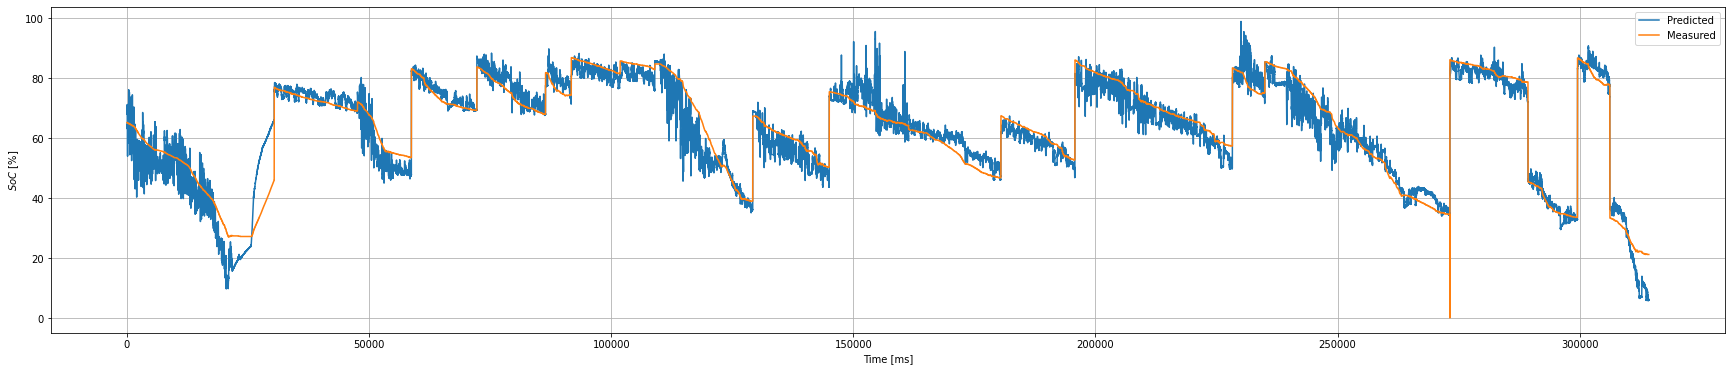

In [27]:
# 1. Create a model
regressor = Sequential([
    layers.Dense(10),
    layers.Dense(100),
    layers.Dense(100),
    layers.Dense(1),
])
# 2. Compile a model
regressor.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                  loss=losses.mae,
                  metrics=["mae"])
# 3. Fit a model
regressor.fit(X_train, y_train, epochs=20, verbose=0)
# 4. Validate the model
y_pred_nn = regressor.predict(X_test)
# 5. Evaluate and visualize
print('Neural Network:')
regression_matrics(y_test, y_pred_nn)
plot_comparison(y_test=y_test, y_pred=y_pred_nn, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=False)

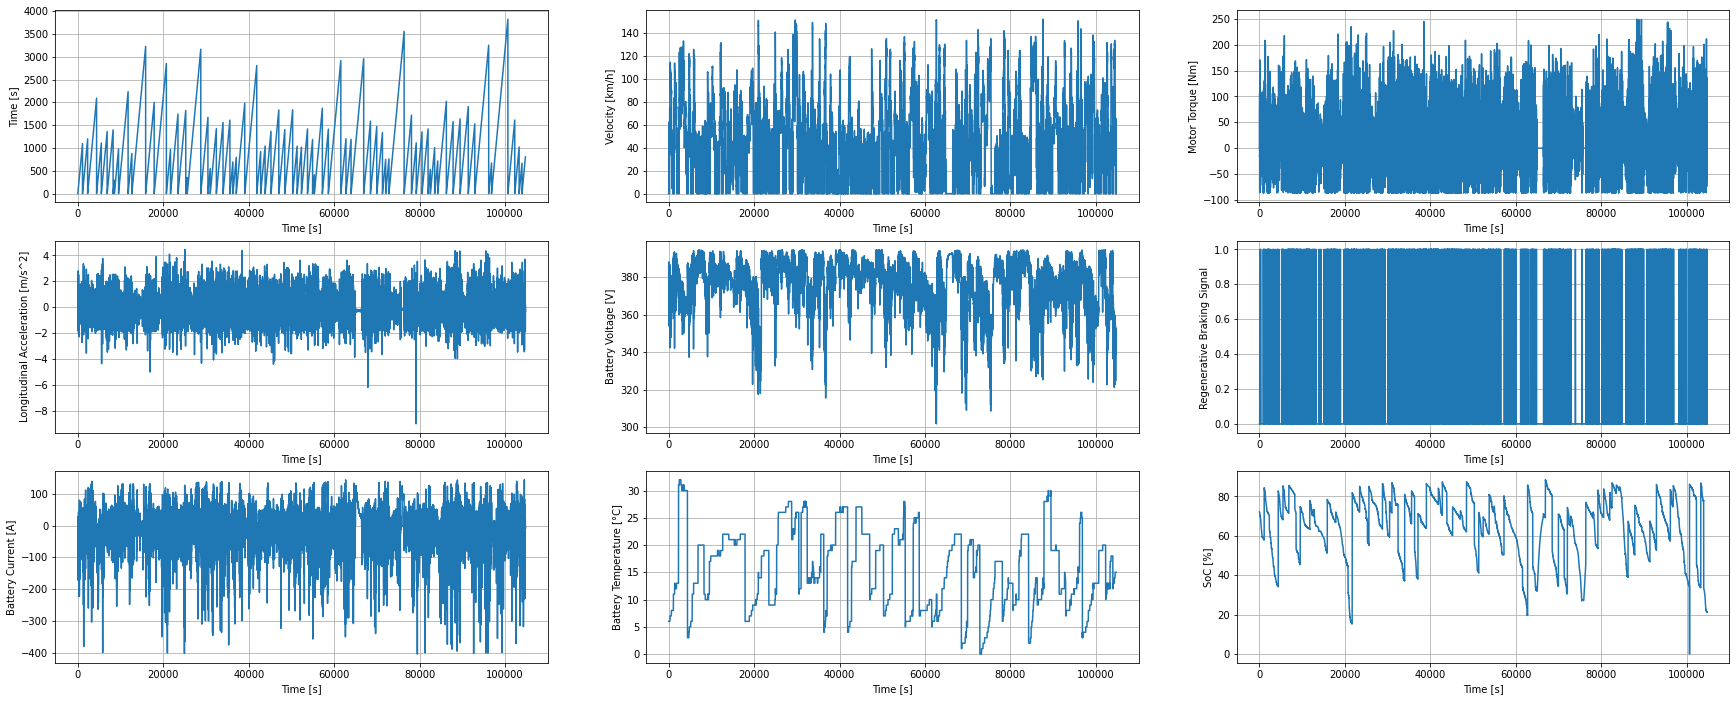

In [28]:
df_x_y = df_master[['Time [s]','Velocity [km/h]','Motor Torque [Nm]','Longitudinal Acceleration [m/s^2]','Battery Voltage [V]','Regenerative Braking Signal ',
                    'Battery Current [A]','Battery Temperature [°C]','SoC [%]']].dropna()

plot_dataframe_subplots(df_x_y, nrows=3, ncols=3, figsize=(30, 12))

In [29]:
# Create and split train and test datasets
X = df_x_y.drop(['Time [s]','SoC [%]'], axis=1)
y = df_x_y[['SoC [%]']]
splitter = int(len(X)*0.7)
X_train = X.values[:splitter]
X_test = X.values[splitter:]
y_train = y.values[:splitter]
y_test = y.values[splitter:]
# Check the dataset sizes
X_train.shape[0] == y_train.shape[0], X_test.shape[0] == y_test.shape[0],\
    X_train.shape[1] == X_test.shape[1], y_train.shape[1] == y_test.shape[1]

(True, True, True, True)

Linear Regression:
Mean Squared Error: 27.71894971375722
Root Mean Square Error: 5.264878888802403
Mean Absolute Error: 3.632464311507832


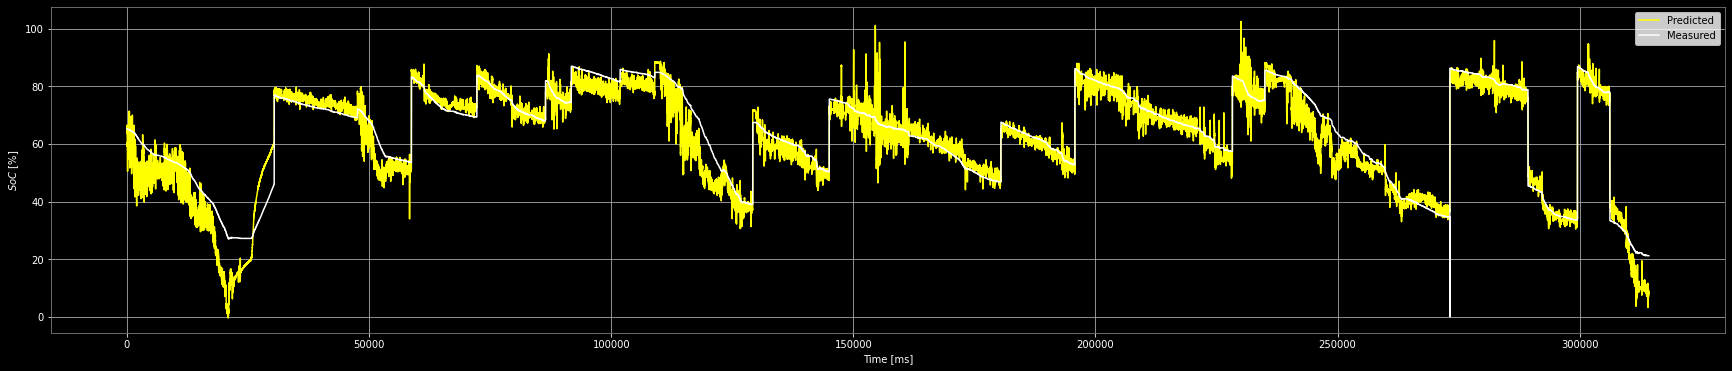

In [30]:
# 1. Create a model
regressor = LinearRegression()
# 2. Fit the model
regressor.fit(X_train, y_train)
# 3. Make predicitons with the model
y_pred_lr = regressor.predict(X_test)
# 4. Evaluate and visualize
print('Linear Regression:')
regression_matrics(y_test, y_pred_lr)
plot_comparison(y_test=y_test, y_pred=y_pred_lr, xlabel="Time [ms]", ylabel="$SoC$ [%]", dark_mode=True)

In [31]:
df_x_y = df_master[['Elevation [m]','Motor Torque [Nm]','Battery Voltage [V]','Battery Current [A]','SoC [%]','Heating Power CAN [kW]', 'Heating Power LIN [W]',
                    'Requested Heating Power [W]', 'AirCon Power [kW]','Heater Signal', 'Heater Current [A]','Ambient Temperature [°C]','Coolant Temperature Heatercore [°C]',
                    'Coolant Temperature Inlet [°C]','Heat Exchanger Temperature [°C]','Cabin Temperature Sensor [°C]','Temperature Coolant Heater Inlet [°C]',
                    'Temperature Coolant Heater Outlet [°C]','Temperature Heat Exchanger Outlet [°C]','Temperature Footweel Driver [°C]','Temperature Footweel Co-Driver [°C]',
                    'Temperature Head Co-Driver [°C]','Temperature Head Driver [°C]','Battery Temperature [°C]']].dropna()

In [32]:
# Create and split train and test datasets
X = df_x_y.drop(['Battery Temperature [°C]'], axis=1)
y = df_x_y[['Battery Temperature [°C]']]
splitter = int(len(X)*0.7)
X_train = X.values[:splitter]
X_test = X.values[splitter:]
y_train = y.values[:splitter]
y_test = y.values[splitter:]
# Check the dataset sizes
X_train.shape[0] == y_train.shape[0], X_test.shape[0] == y_test.shape[0],\
    X_train.shape[1] == X_test.shape[1], y_train.shape[1] == y_test.shape[1]

(True, True, True, True)

Linear Regression:
Mean Squared Error: 10.361332501086707
Root Mean Square Error: 3.2189023752028745
Mean Absolute Error: 2.596168015765212


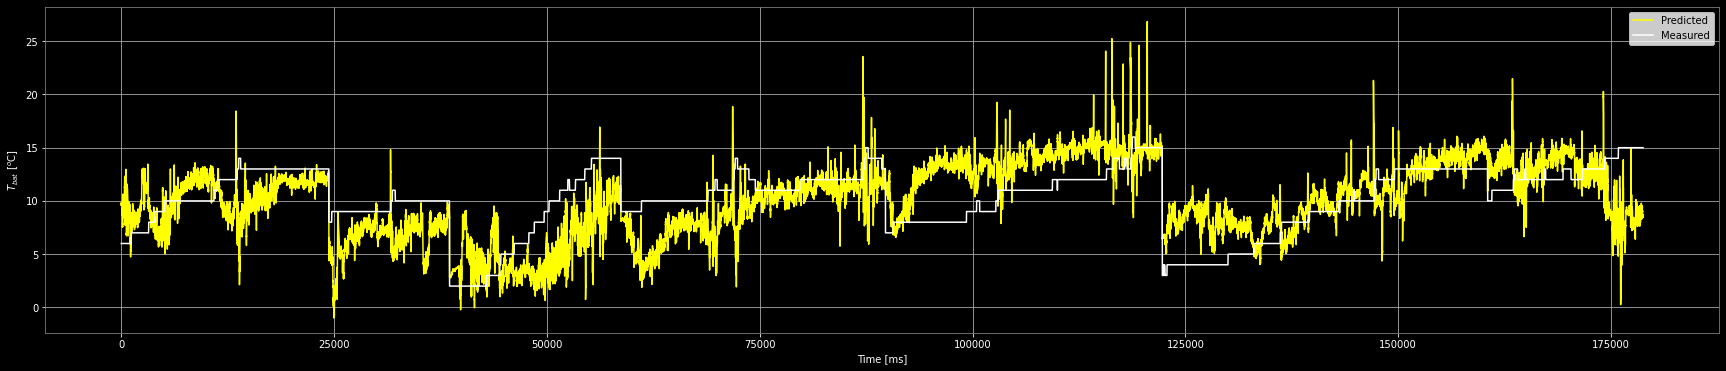

In [33]:
# 1. Create a model
regressor = LinearRegression()
# 2. Fit the model
regressor.fit(X_train, y_train)
# 3. Make predicitons with the model
y_pred_lr = regressor.predict(X_test)
# 4. Evaluate and visualize
print('Linear Regression:')
regression_matrics(y_test, y_pred_lr)
plot_comparison(y_test=y_test, y_pred=y_pred_lr, xlabel="Time [ms]", ylabel='$T_{bat}$ [$^o$C]', dark_mode=True)